In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 0. Carregamento do DataFrame Consolidado ---


In [2]:
# Define o caminho para a pasta 'processed'
processed_data_path = '../data/processed/'
file_path = os.path.join(processed_data_path, 'df_eda_consolidated.csv')

try:
    df = pd.read_csv(file_path)
    print("DataFrame carregado com sucesso!")
except FileNotFoundError:
    print(f"Erro: Arquivo '{file_path}' não encontrado.")
    print("Certifique-se de que o notebook '01_data_understanding.ipynb' foi executado e salvou 'df_eda_consolidated.csv'.")
    exit() # Interrompe a execução se o arquivo não for encontrado


DataFrame carregado com sucesso!


In [4]:
print("\n--- Primeiras 5 linhas do DataFrame ---")
df.head()


--- Primeiras 5 linhas do DataFrame ---


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,target,sector,year_established,revenue,employees,office_location,subsidiary_of,series,sales_price,manager,regional_office
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Engaging,2016-10-20,2017-03-01,1054.0,0,retail,2001.0,718.62,2448.0,United States,NaN,GTX,1096.0,Dustin Brinkmann,Central
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Prospecting,2016-10-25,2017-03-11,4514.0,0,medical,2002.0,3178.24,4540.0,United States,NaN,NaN,NaN,Melvin Marxen,Central
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Engaging,2016-10-25,2017-03-07,50.0,0,retail,2001.0,718.62,2448.0,United States,NaN,MG,55.0,Melvin Marxen,Central
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Engaging,2016-10-25,2017-03-09,588.0,0,software,1998.0,2714.90,2641.0,United States,Acme Corporation,GTX,550.0,Dustin Brinkmann,Central
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Engaging,2016-10-25,2017-03-02,517.0,0,services,1982.0,792.46,1299.0,United States,NaN,GTX,550.0,Summer Sewald,West


In [5]:
print("\n--- Informações do DataFrame ---")
print(df.info())
print("\n--- Fim do carregamento ---")


--- Informações do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   opportunity_id    8800 non-null   object 
 1   sales_agent       8800 non-null   object 
 2   product           8800 non-null   object 
 3   account           7375 non-null   object 
 4   deal_stage        8800 non-null   object 
 5   engage_date       8300 non-null   object 
 6   close_date        6711 non-null   object 
 7   close_value       7487 non-null   float64
 8   target            8800 non-null   int64  
 9   sector            7375 non-null   object 
 10  year_established  7375 non-null   float64
 11  revenue           7375 non-null   float64
 12  employees         7375 non-null   float64
 13  office_location   7375 non-null   object 
 14  subsidiary_of     1292 non-null   object 
 15  series            7320 non-null   object 
 16  sales_pr

# --- 1. Tratamento de Valores Ausentes ---

In [7]:
print("\n--- Contagem e Porcentagem de Valores Ausentes Antes do Preenchimento ---")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df) * 100).sort_values(ascending=False)
print(pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percentage}))


--- Contagem e Porcentagem de Valores Ausentes Antes do Preenchimento ---
                  Missing Count  Missing %
account                    1425  16.193182
close_date                 2089  23.738636
close_value                1313  14.920455
deal_stage                    0   0.000000
employees                  1425  16.193182
engage_date                 500   5.681818
manager                       0   0.000000
office_location            1425  16.193182
opportunity_id                0   0.000000
product                       0   0.000000
regional_office               0   0.000000
revenue                    1425  16.193182
sales_agent                   0   0.000000
sales_price                1480  16.818182
sector                     1425  16.193182
series                     1480  16.818182
subsidiary_of              7508  85.318182
target                        0   0.000000
year_established           1425  16.193182


## 1.1. Preenchimento de Valores Ausentes Categóricos

In [8]:
# Preenche NaNs em colunas categóricas com um valor 'Unknown' ou 'Not_Subsidiary'
df['subsidiary_of'] = df['subsidiary_of'].fillna('Not_Subsidiary')
df['sector'] = df['sector'].fillna('Unknown_Sector')
df['office_location'] = df['office_location'].fillna('Unknown_Location')
# 'account' é um ID, se fosse para ser tratado como categoria, 'Unknown_Account' seria uma opção.
# No entanto, como será removido depois, o preenchimento aqui é apenas para consistência, se necessário.
df['account'] = df['account'].fillna('Unknown_Account')
df['series'] = df['series'].fillna('Unknown_Series')

## 1.2. Preenchimento de Valores Ausentes Numéricos

In [9]:
# Preenche NaNs em colunas numéricas com a mediana.
# 'close_value' já foi tratado no 'df_eda_consolidated.csv' e não deve ter NaNs significativos.
median_revenue = df['revenue'].median()
median_employees = df['employees'].median()
median_year_established = df['year_established'].median()
median_sales_price = df['sales_price'].median()

df['revenue'] = df['revenue'].fillna(median_revenue)
df['employees'] = df['employees'].fillna(median_employees)
df['year_established'] = df['year_established'].fillna(median_year_established)
df['sales_price'] = df['sales_price'].fillna(median_sales_price)

In [10]:
print("\n--- Porcentagem de Valores Ausentes por Coluna APÓS PREENCHIMENTO ---")
missing_data_after_fill = df.isnull().sum()
missing_percentage_after_fill = (missing_data_after_fill / len(df) * 100).sort_values(ascending=False)
print(pd.DataFrame({'Missing Count': missing_data_after_fill, 'Missing %': missing_percentage_after_fill}))


--- Porcentagem de Valores Ausentes por Coluna APÓS PREENCHIMENTO ---
                  Missing Count  Missing %
account                       0   0.000000
close_date                 2089  23.738636
close_value                1313  14.920455
deal_stage                    0   0.000000
employees                     0   0.000000
engage_date                 500   5.681818
manager                       0   0.000000
office_location               0   0.000000
opportunity_id                0   0.000000
product                       0   0.000000
regional_office               0   0.000000
revenue                       0   0.000000
sales_agent                   0   0.000000
sales_price                   0   0.000000
sector                        0   0.000000
series                        0   0.000000
subsidiary_of                 0   0.000000
target                        0   0.000000
year_established              0   0.000000


# --- 2. Engenharia de Features de Data/Duração ---

## 2.1. Conversão de Datas para datetime

In [12]:
# Garante que as colunas de data estejam no formato correto para cálculos.
df['engage_date'] = pd.to_datetime(df['engage_date'], errors='coerce')
df['close_date'] = pd.to_datetime(df['close_date'], errors='coerce')

## 2.2. Criação da feature 'opportunity_duration_days'

In [13]:
# Calcula a duração em dias. Valores NaT (Not a Time) resultarão em NaN na duração.
df['opportunity_duration_days'] = (df['close_date'] - df['engage_date']).dt.days

# Tratamento de NaNs e valores não positivos em 'opportunity_duration_days'
# Usaremos a mediana das durações **válidas e positivas** para imputação.
# Isso garante que a feature seja significativa para o modelo.
valid_durations = df['opportunity_duration_days'][df['opportunity_duration_days'] > 0]
if not valid_durations.empty:
    median_positive_duration = valid_durations.median()
    # Preenche NaNs e valores <= 0 com a mediana das durações válidas e positivas
    df['opportunity_duration_days'] = df['opportunity_duration_days'].apply(
        lambda x: median_positive_duration if pd.isna(x) or x <= 0 else x
    )
else:
    # Caso extremo: se não houver durações válidas e positivas, preenche com 0 ou outro valor que indique ausência.
    # Neste cenário, 0 é um fallback seguro, indicando uma duração mínima ou desconhecida.
    df['opportunity_duration_days'] = df['opportunity_duration_days'].fillna(0).apply(lambda x: 0 if x <= 0 else x)


In [14]:
print("\n--- Informações do DataFrame após engenharia de duração ---")
print(df[['engage_date', 'close_date', 'opportunity_duration_days']].info())


--- Informações do DataFrame após engenharia de duração ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   engage_date                8300 non-null   datetime64[ns]
 1   close_date                 6711 non-null   datetime64[ns]
 2   opportunity_duration_days  8800 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 206.4 KB
None


In [15]:
print("\n--- Estatísticas descritivas da Duração da Oportunidade (em dias) ---")
print(df['opportunity_duration_days'].describe())


--- Estatísticas descritivas da Duração da Oportunidade (em dias) ---
count    8800.000000
mean       47.276705
std        35.876598
min         1.000000
25%        10.000000
50%        45.000000
75%        76.000000
max       138.000000
Name: opportunity_duration_days, dtype: float64


In [16]:
print("\n--- Porcentagem de Valores Ausentes após criação e tratamento de 'opportunity_duration_days' ---")
missing_after_duration = df.isnull().sum()
missing_percentage_after_duration = (missing_after_duration / len(df) * 100).sort_values(ascending=False)
print(pd.DataFrame({'Missing Count': missing_after_duration, 'Missing %': missing_percentage_after_duration}))


--- Porcentagem de Valores Ausentes após criação e tratamento de 'opportunity_duration_days' ---
                           Missing Count  Missing %
account                                0   0.000000
close_date                          2089  23.738636
close_value                         1313  14.920455
deal_stage                             0   0.000000
employees                              0   0.000000
engage_date                          500   5.681818
manager                                0   0.000000
office_location                        0   0.000000
opportunity_duration_days              0   0.000000
opportunity_id                         0   0.000000
product                                0   0.000000
regional_office                        0   0.000000
revenue                                0   0.000000
sales_agent                            0   0.000000
sales_price                            0   0.000000
sector                                 0   0.000000
series            

# --- 3. Codificação de Variáveis Categóricas ---

In [17]:
# Identifica colunas categóricas para One-Hot Encoding.
# Exclui IDs e colunas de data originais, e a variável alvo 'target'.
categorical_cols = df.select_dtypes(include='object').columns.tolist()

cols_to_exclude_from_encoding = ['opportunity_id', 'account', 'engage_date', 'close_date', 'target']
cols_to_encode = [col for col in categorical_cols if col not in cols_to_exclude_from_encoding]

print(f"\nColunas categóricas identificadas para One-Hot Encoding: {cols_to_encode}")



Colunas categóricas identificadas para One-Hot Encoding: ['sales_agent', 'product', 'deal_stage', 'sector', 'office_location', 'subsidiary_of', 'series', 'manager', 'regional_office']


In [18]:
# Aplica One-Hot Encoding, removendo a primeira categoria para evitar multicolinearidade
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True, dtype=int)

print("\n--- Informações do DataFrame após One-Hot Encoding ---")
df_encoded.info(verbose=True, show_counts=True)



--- Informações do DataFrame após One-Hot Encoding ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 89 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   opportunity_id                    8800 non-null   object        
 1   account                           8800 non-null   object        
 2   engage_date                       8300 non-null   datetime64[ns]
 3   close_date                        6711 non-null   datetime64[ns]
 4   close_value                       7487 non-null   float64       
 5   target                            8800 non-null   int64         
 6   year_established                  8800 non-null   float64       
 7   revenue                           8800 non-null   float64       
 8   employees                         8800 non-null   float64       
 9   sales_price                       8800 non-null   float64     

In [19]:
print("\n--- Primeiras 5 linhas do DataFrame codificado (após One-Hot Encoding) ---")
df_encoded.head()


--- Primeiras 5 linhas do DataFrame codificado (após One-Hot Encoding) ---


,opportunity_id,account,engage_date,close_date,close_value,target,year_established,revenue,employees,sales_price,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,1C1I7A6R,Cancity,2016-10-20,2017-03-01,1054.0,0,2001.0,718.62,2448.0,1096.0,...,1,0,0,0,1,0,0,0,0,0
1,Z063OYW0,Isdom,2016-10-25,2017-03-11,4514.0,0,2002.0,3178.24,4540.0,1096.0,...,0,0,1,0,0,1,0,0,0,0
2,EC4QE1BX,Cancity,2016-10-25,2017-03-07,50.0,0,2001.0,718.62,2448.0,55.0,...,0,1,0,0,0,1,0,0,0,0
3,MV1LWRNH,Codehow,2016-10-25,2017-03-09,588.0,0,1998.0,2714.90,2641.0,550.0,...,1,0,0,0,1,0,0,0,0,0
4,PE84CX4O,Hatfan,2016-10-25,2017-03-02,517.0,0,1982.0,792.46,1299.0,550.0,...,1,0,0,0,0,0,0,1,0,1


# --- 4. Remover Colunas Não Mais Necessárias ---

In [20]:
# Lista de colunas a serem removidas: IDs e datas originais que já foram transformadas.
columns_to_drop = ['opportunity_id', 'account', 'engage_date', 'close_date']

# Remove a coluna 'close_value_filled' se ela existir (para compatibilidade/segurança)
if 'close_value_filled' in df_encoded.columns:
    columns_to_drop.append('close_value_filled')
    print("Coluna 'close_value_filled' encontrada e adicionada para remoção.")

df_final = df_encoded.drop(columns=columns_to_drop, errors='ignore')

print(f"\nColunas removidas: {columns_to_drop}")


Colunas removidas: ['opportunity_id', 'account', 'engage_date', 'close_date']


In [21]:
print("\n--- Informações do DataFrame final após remoção de colunas ---")
df_final.info(verbose=True, show_counts=True)


--- Informações do DataFrame final após remoção de colunas ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   close_value                       7487 non-null   float64
 1   target                            8800 non-null   int64  
 2   year_established                  8800 non-null   float64
 3   revenue                           8800 non-null   float64
 4   employees                         8800 non-null   float64
 5   sales_price                       8800 non-null   float64
 6   opportunity_duration_days         8800 non-null   float64
 7   sales_agent_Boris Faz             8800 non-null   int64  
 8   sales_agent_Cassey Cress          8800 non-null   int64  
 9   sales_agent_Cecily Lampkin        8800 non-null   int64  
 10  sales_agent_Corliss Cosme         8800 non-null   int64  
 11  sales

In [22]:
print("\n--- Primeiras 5 linhas do DataFrame final ---")
df_final.head()


--- Primeiras 5 linhas do DataFrame final ---


,close_value,target,year_established,revenue,employees,sales_price,opportunity_duration_days,sales_agent_Boris Faz,sales_agent_Cassey Cress,sales_agent_Cecily Lampkin,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,1054.0,0,2001.0,718.62,2448.0,1096.0,132.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,4514.0,0,2002.0,3178.24,4540.0,1096.0,137.0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,50.0,0,2001.0,718.62,2448.0,55.0,133.0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,588.0,0,1998.0,2714.90,2641.0,550.0,135.0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,517.0,0,1982.0,792.46,1299.0,550.0,128.0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# --- 5. Escalonamento de Variáveis Numéricas ---

In [23]:
# Identifica as colunas numéricas que precisam ser escalonadas para a modelagem.
# 'target' é a variável alvo e não é escalonada.
numeric_cols = [
    'year_established', 'revenue', 'employees',
    'sales_price', 'close_value', 'opportunity_duration_days'
]

print(f"\nColunas numéricas para escalonamento: {numeric_cols}")


Colunas numéricas para escalonamento: ['year_established', 'revenue', 'employees', 'sales_price', 'close_value', 'opportunity_duration_days']


In [24]:
# Inicializa e aplica o StandardScaler para padronizar as features numéricas.
scaler = StandardScaler()
df_final[numeric_cols] = scaler.fit_transform(df_final[numeric_cols])

In [25]:
print("\n--- Estatísticas Descritivas das Colunas Numéricas Após Escalonamento ---")
print(df_final[numeric_cols].describe())


--- Estatísticas Descritivas das Colunas Numéricas Após Escalonamento ---
       year_established       revenue     employees   sales_price  \
count      8.800000e+03  8.800000e+03  8.800000e+03  8.800000e+03   
mean      -9.780056e-17 -1.469532e-16 -1.937844e-17 -1.614870e-17   
std        1.000057e+00  1.000057e+00  1.000057e+00  1.000057e+00   
min       -1.950284e+00 -9.770450e-01 -8.477060e-01 -7.052859e-01   
25%       -6.425926e-01 -6.786835e-01 -5.967856e-01 -4.996368e-01   
50%       -4.818736e-02 -2.693890e-01 -2.942191e-01 -2.727997e-01   
75%        5.462179e-01  1.991199e-01  1.793356e-01  6.814951e-01   
max        2.567196e+00  3.908805e+00  4.599603e+00  1.039270e+01   

        close_value  opportunity_duration_days  
count  7.487000e+03               8.800000e+03  
mean   8.161704e-17               5.167584e-17  
std    1.000067e+00               1.000057e+00  
min   -9.001115e-01              -1.289959e+00  
25%   -7.056965e-01              -1.039085e+00  
50%   -5.

In [26]:
print("\n--- Primeiras 5 linhas do DataFrame Final (após escalonamento) ---")
df_final.head()


--- Primeiras 5 linhas do DataFrame Final (após escalonamento) ---


,close_value,target,year_established,revenue,employees,sales_price,opportunity_duration_days,sales_agent_Boris Faz,sales_agent_Cassey Cress,sales_agent_Cecily Lampkin,...,series_GTX,series_MG,series_Unknown_Series,manager_Celia Rouche,manager_Dustin Brinkmann,manager_Melvin Marxen,manager_Rocco Neubert,manager_Summer Sewald,regional_office_East,regional_office_West
0,-0.511008,0,0.665099,-0.678683,-0.460122,-0.272800,2.361654,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,0.814089,0,0.783980,0.349011,-0.127680,-0.272800,2.501029,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.895516,0,0.665099,-0.678683,-0.460122,-0.705286,2.389529,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,-0.689475,0,0.308456,0.155415,-0.429452,-0.499637,2.445279,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,-0.716666,0,-1.593641,-0.647831,-0.642711,-0.499637,2.250154,0,0,0,...,1,0,0,0,0,0,0,1,0,1


# --- 6. Preparação para Modelagem: Separar X e y, e Dividir em Treino/Teste ---


In [27]:
# Separa o DataFrame em features (X) e a variável alvo (y).
X = df_final.drop('target', axis=1)
y = df_final['target']

print(f"\nFormato de X (Features): {X.shape}")
print(f"Formato de y (Target): {y.shape}")


Formato de X (Features): (8800, 84)
Formato de y (Target): (8800,)


In [28]:
# Divide os dados em conjuntos de treinamento e teste (80/20 split).
# 'random_state' garante reprodutibilidade e 'stratify=y' mantém a proporção das classes alvo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nFormato de X_train: {X_train.shape}")
print(f"Formato de X_test: {X_test.shape}")
print(f"Formato de y_train: {y_train.shape}")
print(f"Formato de y_test: {y_test.shape}")


Formato de X_train: (7040, 84)
Formato de X_test: (1760, 84)
Formato de y_train: (7040,)
Formato de y_test: (1760,)


In [29]:
# Verifica a proporção da classe alvo nos conjuntos.
print("\nProporção da classe alvo em y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporção da classe alvo em y_test:")
print(y_test.value_counts(normalize=True))


Proporção da classe alvo em y_train:
target
0    0.630824
1    0.369176
Name: proportion, dtype: float64

Proporção da classe alvo em y_test:
target
0    0.630682
1    0.369318
Name: proportion, dtype: float64


In [31]:
# Verificar a proporção da classe alvo nos conjuntos de treino e teste
print("\nProporção da classe alvo em y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporção da classe alvo em y_test:")
print(y_test.value_counts(normalize=True))


Proporção da classe alvo em y_train:
target
0    0.719034
1    0.280966
Name: proportion, dtype: float64

Proporção da classe alvo em y_test:
target
0    0.71875
1    0.28125
Name: proportion, dtype: float64


# --- 7. Modelo Baseline: Previsor da Classe Majoritária ---

In [30]:
# Estabelece um baseline simples para comparação de desempenho futuro.
# Prevê a classe majoritária (0: Oportunidade Ganha) para todas as instâncias de teste.
major_class = y_train.mode()[0]
y_pred_baseline = [major_class] * len(y_test)

In [31]:
print("\n--- Relatório de Classificação do Modelo Baseline (Classe Majoritária) ---")
# 'zero_division=0' evita avisos se uma classe não for prevista.
print(classification_report(y_test, y_pred_baseline, zero_division=0))


--- Relatório de Classificação do Modelo Baseline (Classe Majoritária) ---
              precision    recall  f1-score   support

           0       0.63      1.00      0.77      1110
           1       0.00      0.00      0.00       650

    accuracy                           0.63      1760
   macro avg       0.32      0.50      0.39      1760
weighted avg       0.40      0.63      0.49      1760



In [32]:
print("\n--- Matriz de Confusão do Modelo Baseline ---")
cm_baseline = confusion_matrix(y_test, y_pred_baseline)
print(cm_baseline)


--- Matriz de Confusão do Modelo Baseline ---
[[1110    0]
 [ 650    0]]


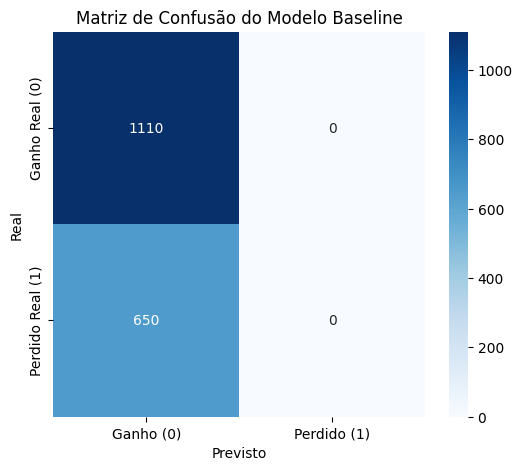

In [33]:
# Visualiza a Matriz de Confusão do Baseline.
plt.figure(figsize=(6, 5))
sns.heatmap(cm_baseline, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ganho (0)', 'Perdido (1)'],
            yticklabels=['Ganho Real (0)', 'Perdido Real (1)'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão do Modelo Baseline')
plt.show()

# --- 8. Salvar Dados Pré-Processados ---

In [34]:
# Garante que o diretório de saída exista.
output_dir = '../data/processed'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salva os conjuntos de treino e teste para uso nos próximos notebooks.
X_train.to_csv(os.path.join(output_dir, 'X_train.csv'), index=False)
X_test.to_csv(os.path.join(output_dir, 'X_test.csv'), index=False)
y_train.to_csv(os.path.join(output_dir, 'y_train.csv'), index=False)
y_test.to_csv(os.path.join(output_dir, 'y_test.csv'), index=False)

print(f"\nDados pré-processados salvos em '{output_dir}'.")



Dados pré-processados salvos em '../data/processed'.
